
# DMT 2022 - Homework 3


# Instructions for the homework
  > Follow the instructions in the notebook carefully
  


## General instructions
  * Do NOT remove ANYTHING that is already in the notebook.
  * Before you start, show the line number for the code cells:
    * Go to Tools -> Settings -> Editor -> show line numbers
  * Having **EXACTLY TWO** students per group is **MANDATORY**
  * The software must be commented.
  * The notebook will be converted to a PDF, so you must use prints and plots that are displayed in the derived PDF.
  * About this notebook:
    * Create a personal copy to be able to modify it: File > Save a copy in Drive
    * Rename the copied notebook `DMT2022-HW3.ipynb`


## Instructions for **code**:
  * DO NOT add code cells
  * DO NOT remove any code cells
  * Only edit the code cells containing the comment `#YOUR CODE STARTS HERE#`. Within those cells:
    * DO NOT remove ANYTHING that we have written (otherwise specified). In particular, the line `#REMOVE_OUTPUT#` is used in some cells to remove the output of those cells when the notebook is converted to PDF.
    * Add your code between line `#YOUR CODE STARTS HERE#` and line `#YOUR CODE ENDS HERE#`; **DO NOT REMOVE THESE COMMENTS**
    * **The last line in each code cell is #THIS IS LINE \<TOT>#, where \<TOT> is a line number. The notebook is constructed so that \<TOT> matches with the line number in which it is written, but it may of course move as you add your code. Make sure that, when you deliver it, that comment returns to line \<TOT>. DO NOT CHANGE THE \<TOT> VALUE. Of course, this means that you have a limited number of lines of code that you may NOT exceed under any circumstances. On the other hand, if your code is shorter than that, you have to reach that line number with empty lines.**

[comment]: <> (#REMOVE_CELL#)


## Instructions for **text**:
* DO NOT add text cells
* DO NOT remove text cells
* DO NOT modify the text cells we have created.
* Only edit text cells starting with the comment ----------YOUR TEXT STARTS HERE----------. Within those cells:
  * Do NOT remove anything we have entered.
  * **Add your own text after the line ----------YOUR TEXT STARTS HERE----------; DO NOT REMOVE THIS TEXT**
  * For each cell, a specific delivery will be given. If you are given a maximum number of sentences to write, both the dot "." and the semicolon ";" will be considered sentence dividers.

[comment]: <> (#REMOVE_CELL#)

# Homework
In this homework, your goal will be to obtain the best classification on the provided dataset according to a metric specified in each section.

Ensure that the results you obtain can be accurately replicated by anyone running the notebook.

If you have to set a random seed, always choose: `2468`.

## Group composition:

Write down the list of group members. The format should be Last Name, First Name, Student ID. Group members should be sorted alphabetically by surname and placed on different lines.
Example:

Fazzone, Adriano, 987654

Siciliano, Federico, 999888

----------YOUR TEXT STARTS HERE----------

Mattei, Luca, 1852190

Pandolfo, Mario Edoardo, 1835189

# Part 1
In this part of the homework, simple data encodings will be used.

## Part 1.0
Import **ALL** the Python packages that you need for Part 1.

In [ ]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import string
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import nltk; from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer
from nltk import word_tokenize; nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.decomposition import PCA, TruncatedSVD
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1.0.1
Download the dataset from the Drive link (code already provided).

The dataset is a list of reviews, containing the text and the sentiment of the review; 1 represents a positive review, while 0 represents a negative review. The file has no header.

In [ ]:
#REMOVE_OUTPUT#
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#REMOVE_OUTPUT#
!gdown 1oDvIo7sMAlxdF82uMXkYEmoeV7P4evcs #download hw3_data.csv

Downloading...
From: https://drive.google.com/uc?id=1oDvIo7sMAlxdF82uMXkYEmoeV7P4evcs
To: /content/hw3_data.csv
100% 10.7M/10.7M [00:00<00:00, 214MB/s]


## Part 1.1
In this part, we will perform a tf-idf encoding of the data,
and then train a classifier, optimising its hyper-parameters.

In the various steps, we will slowly prepare a pipeline to perform a hyper-parameter optimisation; try to prepare the required objects with this target in mind.

The goal is to maximise the f1-score on the test set that will be defined in step 1.1.2.

### 1.1.1
Load and inspect the dataset: print the total number of rows.

Print also the first 3 rows of the dataset.

SHAPE OF THE DATASET
Number of rows:   23333
Number of columns:    2




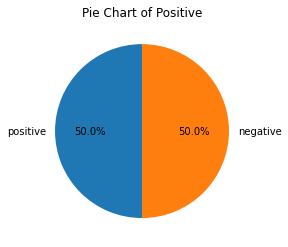

,review,positive
0,"When I first had this tea, the taste was familar, as was the sensation that I couldn't immediately tell if I loved or hated it. What it reminded me of was those hard red candies called ""fireballs."" It is a very strong and spicey tea. I am now buying it in multiple packs of 50 which I keep in the freezer for freshness, so I guess you could say that I made up my mind.",1
1,"There was no size information included in Amazon's description, so I went looking for it.\n\n* Measures 191"" x 48"" x 46"" h., constructed of 2"" steel tubing, two large plated ""S"" hooks\n* Fits up to 14 ft. hammocks (hammock not included)\n* Easy to set-up\n* Assembly / information sheet\n* Weighs 56 1/2 lbs.",1
2,This one is just as bright as the AA Mini MagLite and is considerably thinner and lighter. Extremely durable. I've had one for several years now and it's taken quite a beating in the car and in my toolbox,1


In [ ]:
#YOUR CODE STARTS HERE#
data = pd.read_csv('hw3_data.csv', names = ['review', 'positive'])    #read data

data = data.dropna(axis = 0)           #drop na

print('SHAPE OF THE DATASET')                          
print('Number of rows:  ', data.shape[0])
print('Number of columns:   ', data.shape[1])
for i in range(2): print('')

plt.pie(list(data.positive.value_counts()/len(data.positive)), startangle=90, labels = ['positive', 'negative'], autopct='%1.1f%%')
plt.title('Pie Chart of Positive')
plt.show()
for i in range(2): print('')

pd.set_option('display.max_colwidth', None)    #enable python to show all content in the review field
display(data.iloc[range(3)])

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

### 1.1.2
Divide the dataset into training set (85%) and test set (15%).

Print out the percentage of samples with positive labels in the training set and the percentage of samples with positive labels in the test set.

In [ ]:
#YOUR CODE STARTS HERE#

x = data.review.to_numpy()               #transform reviews to numpy array

y = data.positive.to_numpy()             #transform label to numpy array

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15, shuffle=True, random_state = 2468)  #slit into train and test

print('Percentage of samples with positive labels in the training set:  ', np.mean(train_y)*100, '%')

print('')

print('Percentage of samples with positive labels in the test set:  ',  np.mean(test_y)*100, '%')





#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Percentage of samples with positive labels in the training set:   50.002521050773964 %

Percentage of samples with positive labels in the test set:   50.0 %


### 1.1.3
Create an object that performs a tf-idf transformation on the data. The transformation must strip accents.

Create a dictionary containing configurations for the tf-idf vectorizer.
The configurations must vary at least 3 different parameters.

In [ ]:
#YOUR CODE STARTS HERE#

vectorizer = TfidfVectorizer(strip_accents = 'ascii', preprocessor = None)   #define vectorizer

stemmer = EnglishStemmer()                                                   #define stemmer

english_stopwords = set(stopwords.words('english'))                          #stopwords
#functions for stemming
def stemming_tokenizer(text):
	stemmed_text = [stemmer.stem(word) for word in word_tokenize(text, language='english')]
	return stemmed_text

def stemming_stop_tokenizer(text):
	stemmed_text = [stemmer.stem(word) for word in word_tokenize(text, language='english') if word not in english_stopwords]
	return stemmed_text
#dictionary containing configuration
conf = {'vect__tokenizer': [None, stemming_tokenizer, stemming_stop_tokenizer], 'vect__ngram_range': [(1, 1), (1, 2), (1, 3)], 'vect__min_df': [0.0, 0.1, 0.2]}

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

### 1.1.4
Choose a maximum of 2 classification algorithms (from those seen during the course) and prepare objects containing them.

For each of the selected classification algorithms, prepare a hyper-parameter configuration with exactly **5 values** for **EACH parameter**.

> **If a parameter is itself composed of several parameters (if it is a dictionary, for example), each of these will need to have 5 values.*

In [ ]:
#YOUR CODE STARTS HERE#


MNB = MultinomialNB()                                                         #first classifier
KNN = KNeighborsClassifier(n_jobs = -1)                                       #second classifier

MNB_param = {'MNB__alpha': [0.01, 0.1, 1.0, 10., 20.]}                        #param first calssifier    


KNN_param = {'KNN__n_neighbors': [3, 5, 10, 15, 25]}                          #param second classifier


















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

### 1.1.5
For each of the classification algorithms selected in step 1.1.4,
perform a 3-fold Cross-Validation on the training set, combining the configurations of the vectorizer defined in step 1.1.3 and those of the classifier being used defined in step 1.1.4.

Perform the best hyper-parameter optimisation you can afford in **LESS than 30 minutes**. Print out the total time taken.

If you are using two classifications algorithms, the maximum total optimisation time is **INSTEAD** 60 minutes.

In [ ]:
#YOUR CODE STARTS HERE#

t1 = time.perf_counter()

#make pipeline for MNB
pipeline_MNB = Pipeline([
	('vect', vectorizer),
	('MNB', MNB),
	])

parameters_1 = {**conf, **MNB_param}      #union of the dicts

grid_search_MNB = RandomizedSearchCV(pipeline_MNB, parameters_1, scoring = 'f1',                        #grid search
													      		 cv = 3, n_iter = 15, verbose = -1, random_state = 2468)

grid_search_MNB.fit(train_x, train_y)



#make pipeline for KNN
pipeline_KNN = Pipeline([
	('vect', vectorizer),
	('KNN', KNN),
	])


parameters_2 = {**conf, **KNN_param}      #union of the dicts

grid_search_KNN = RandomizedSearchCV(pipeline_KNN, parameters_2,  scoring = 'f1',                       #grid search
                                     cv = 3, n_iter = 15, verbose = -1, random_state = 2468)

grid_search_KNN.fit(train_x, train_y)


t2 = time.perf_counter()

print('time taken to run:', np.ceil((t2 - t1)/60), ' min')

#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

time taken to run: 43.0  min


### 1.1.6
For each of the optimisations run in step 1.1.5:
  1. Select the 3 best configurations and print them.
  2. Produce a plot with mean and standard deviation of the f1-score calculated on the test set.

[{'vect__tokenizer': <function stemming_tokenizer at 0x7f35447e9f80>, 'vect__ngram_range': (1, 3), 'vect__min_df': 0.0, 'MNB__alpha': 0.01}
 {'vect__tokenizer': <function stemming_tokenizer at 0x7f35447e9f80>, 'vect__ngram_range': (1, 3), 'vect__min_df': 0.0, 'MNB__alpha': 1.0}
 {'vect__tokenizer': <function stemming_tokenizer at 0x7f35447e9f80>, 'vect__ngram_range': (1, 2), 'vect__min_df': 0.0, 'MNB__alpha': 0.01}]



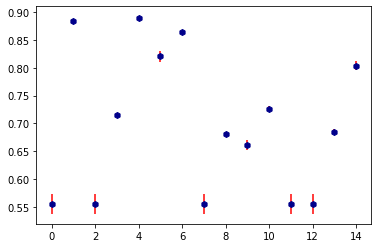



[{'vect__tokenizer': None, 'vect__ngram_range': (1, 1), 'vect__min_df': 0.0, 'KNN__n_neighbors': 25}
 {'vect__tokenizer': <function stemming_tokenizer at 0x7f35447e9f80>, 'vect__ngram_range': (1, 3), 'vect__min_df': 0.0, 'KNN__n_neighbors': 10}
 {'vect__tokenizer': <function stemming_tokenizer at 0x7f35447e9f80>, 'vect__ngram_range': (1, 3), 'vect__min_df': 0.0, 'KNN__n_neighbors': 3}]



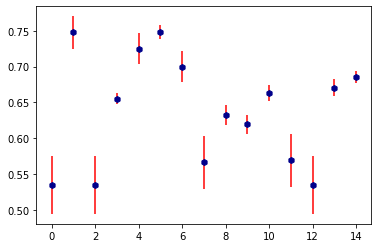

In [ ]:
#YOUR CODE STARTS HERE#
#sort the IDs according to the mean score in test
idx_1 = sorted(range(len(grid_search_MNB.cv_results_['mean_test_score'])), reverse = True, key=lambda i: grid_search_MNB.cv_results_['mean_test_score'][i])
print(np.array(grid_search_MNB.cv_results_['params'])[idx_1[0:3]])
print('')
#plot each mean score in test and +/- two times the corresponding std
plt.errorbar(range(len(grid_search_MNB.cv_results_['std_test_score'])), grid_search_MNB.cv_results_['mean_test_score'], 
             grid_search_MNB.cv_results_['std_test_score']*2, linestyle='None', marker='h', color = 'darkblue', ecolor = 'red') 
plt.show()

for i in range(2): print('')
idx_2 = sorted(range(len(grid_search_KNN.cv_results_['mean_test_score'])), reverse = True, key=lambda i: grid_search_KNN.cv_results_['mean_test_score'][i])
print(np.array(grid_search_KNN.cv_results_['params'])[idx_2[0:3]])
print('')
plt.errorbar(range(len(grid_search_KNN.cv_results_['std_test_score'])), grid_search_KNN.cv_results_['mean_test_score'],
             grid_search_KNN.cv_results_['std_test_score']*2, linestyle='None', marker='h', color = 'darkblue', ecolor = 'red')
plt.show()

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

For each plot produced, which combination of hyper-parameters would you select?

**Use at most 2 sentences (per plot).**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

In both cases I would choose the configuration with the highest F1 score: their standard deviation it's not high enough to have a very large interval. This means that in both cases the best model of the optimization coincide on the model I am gonna take into consideration.

### 1.1.7
For each of the optimisations, obtain a classifier using the parameters you selected in step 1.1.6.

Apply the classifier(s) to obtain the confusion matrix on the test data and print it out.

In [ ]:
#YOUR CODE STARTS HERE#

pred_test_y_MNB = grid_search_MNB.predict(test_x)                                     #predictions

confusion_matrix_MNB = metrics.confusion_matrix(test_y, pred_test_y_MNB)              #confusion matrix
print()
print("Confusion Matrix MNB: ")
display(pd.DataFrame(confusion_matrix_MNB))
print()



pred_test_y_KNN = grid_search_KNN.predict(test_x)

confusion_matrix_KNN = metrics.confusion_matrix(test_y, pred_test_y_KNN)
print()
print("Confusion Matrix KNN: ")
display(pd.DataFrame(confusion_matrix_KNN))










#YOUR CODE ENDS HERE#
#THIS IS LINE 30#


Confusion Matrix MNB: 


,0,1
0,1594,156
1,194,1556




Confusion Matrix KNN: 


,0,1
0,1299,451
1,439,1311


## Part 1.2
In this part, we will perform a one-hot encoding of the data, then train a classifier, optimising its hyper-parameters.

The goal is to maximise accuracy on the test set defined in step 1.1.2

### 1.2.1
Use the same data partitioned in part 1.1.2.

Transform the data with one-hot encoding.

In [ ]:
#YOUR CODE STARTS HERE#

#object  to remove punctuation 
stripPunct = str.maketrans('', '', string.punctuation)

train_x = np.array([i.translate(stripPunct) for i in train_x])     #new train without punctuation

test_x = np.array([i.translate(stripPunct) for i in test_x])       #new test without punctuation

#define object to transform data with one-hot encoding
one_hot_encoder = CountVectorizer(strip_accents = 'ascii', tokenizer = stemming_tokenizer, binary = True, max_df = 2)  

#fit and transform on train
train_one_hot = one_hot_encoder.fit_transform(train_x)

#only transform on test
test_one_hot = one_hot_encoder.transform(test_x)

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

### 1.2.2
Before training the classifier, transform the data using Principal Component Analysis.

Taking into account the objective of Part 1.2 and the limitations explained in the following steps, estimate and select the best number of components.

Multiple code cells are provided, but it is **NOT** mandatory to use them all.

In [ ]:
#YOUR CODE STARTS HERE#
n_components = 8000
var = 0.95

pca = TruncatedSVD(random_state = 2468, n_components= n_components)
pca.fit(train_one_hot)

cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

best_n_components = np.where(cumulative_explained_variance_ratio>var)[0][0]+1

print("Best number of components:", best_n_components)






#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Best number of components: 7951


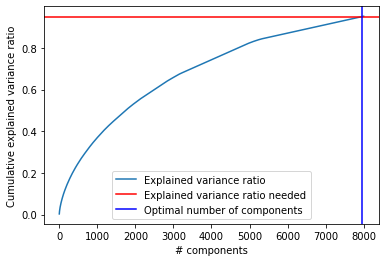

In [ ]:
#YOUR CODE STARTS HERE#

# We plot the curve of the cumulative explained ratio
plt.plot(range(1,n_components+1),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# components")
plt.ylabel("Cumulative explained variance ratio")
plt.axhline(var, color="red")
plt.axvline(best_n_components, color="blue")
plt.legend(["Explained variance ratio","Explained variance ratio needed","Optimal number of components"])
plt.show()

# We perform the TruncatedSVD with number of components equal 2
pca = TruncatedSVD(random_state = 2468, n_components= 2)  #best_n_components)
pca.fit(train_one_hot)

# We perform the transformation of train_x and test_x
pca_train_x = pca.transform(train_one_hot)
pca_test_x = pca.transform(test_one_hot)
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Explain your decision in **at most 2 sentences**.

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------


Being the input a sparse matrix, we had to use TruncatedSVD. We have tried to use the automatic method to find the best number of components (with varaince 0.95) but for the 1.2.3 time limit we have to choose number of components equal to 2.

### 1.2.3
You must optimise the hyper-parameters of a classifier by respecting the following limits:
> Regarding the classifier:
  * The classifier must be **KNeighborsClassifier**
  * The algorithm used must be **"brute"**.
  * It is forbidden to run the algorithm in *parallel* (must be specified)

> Regarding the optimisation:
  * A **9-fold** Cross-Validation must be performed
  * You must test **exactly 20** configurations
  * Optimisation CANNOT take longer than **100 seconds**. Print out the execution time
  * It is forbidden to run the optimisation in *parallel* (must be specified)

In [ ]:
#YOUR CODE STARTS HERE#

#object for KNN
KNN = KNeighborsClassifier(algorithm = 'brute')

#dict with parameters
parameters = {'n_neighbors': [1, 2, 3, 4, 5],
              'weights': ['uniform', 'distance'],
              'p': [1, 2] }

#grid search object       
grid_search = GridSearchCV(KNN, parameters, scoring = 'accuracy', n_jobs= 1, cv = 9, verbose = 3)

t1 = time.time()

#running optimization
grid_search.fit(pca_train_x, train_y)


t2 = time.time()

print('time taken to run:', t2 - t1, ' seconds')






#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Fitting 9 folds for each of 20 candidates, totalling 180 fits
[CV 1/9] END n_neighbors=1, p=1, weights=uniform;, score=0.531 total time=   0.6s
[CV 2/9] END n_neighbors=1, p=1, weights=uniform;, score=0.521 total time=   0.4s
[CV 3/9] END n_neighbors=1, p=1, weights=uniform;, score=0.515 total time=   0.3s
[CV 4/9] END n_neighbors=1, p=1, weights=uniform;, score=0.521 total time=   0.3s
[CV 5/9] END n_neighbors=1, p=1, weights=uniform;, score=0.526 total time=   0.3s
[CV 6/9] END n_neighbors=1, p=1, weights=uniform;, score=0.538 total time=   0.3s
[CV 7/9] END n_neighbors=1, p=1, weights=uniform;, score=0.528 total time=   0.3s
[CV 8/9] END n_neighbors=1, p=1, weights=uniform;, score=0.525 total time=   0.3s
[CV 9/9] END n_neighbors=1, p=1, weights=uniform;, score=0.520 total time=   0.3s
[CV 1/9] END n_neighbors=1, p=1, weights=distance;, score=0.531 total time=   0.2s
[CV 2/9] END n_neighbors=1, p=1, weights=distance;, score=0.521 total time=   0.2s
[CV 3/9] END n_neighbors=1, p=1, w

### 1.2.4
Select the combination of hyper-parameters that obtains the **best accuracy**.

Apply the classifier that uses these parameters to obtain the confusion matrix on the test data and print it out.

In [ ]:
#YOUR CODE STARTS HERE#

#printing the best hyper-parameters
print(grid_search.best_params_)

for i in range(2): print('')

pred = grid_search.predict(pca_test_x)                                                #predictions

confusion_matrix = metrics.confusion_matrix(test_y, pred)                             #confusion matrix

print("Confusion Matrix: ")

display(pd.DataFrame(confusion_matrix))














#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


Confusion Matrix: 


,0,1
0,376,1374
1,290,1460


# Part 2
In this part of the homework, more complex data encodings will be used.

## Part 2.0
Import here **ALL** the Python packages that you need for Part 2.

In [ ]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
import numpy as np; from sklearn import metrics; from sklearn.neighbors import KNeighborsClassifier
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer; from sklearn.svm import SVC
import time; from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier; from sklearn.tree import DecisionTreeClassifier
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 4.0 MB/s 
     |████████████████████████████████| 4.2 MB 8.8 MB/s 
     |████████████████████████████████| 1.2 MB 55.8 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 596 kB 60.9 MB/s 
     |████████████████████████████████| 6.6 MB 48.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=3068e60b45d1c557dfcb701675054e0c2135ac619b9e6fcf56fd628d85037e22
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Part 2.1
In this part, we will use a Transformer to obtain sentence embeddings for each document.

We will then train a classifier, optimising its hyper-parameters.

The goal is to maximise precision on the test set defined in step 1.1.2, but it is necessary to have a recall of **at least 70%**, according to the optimisation results.


### 2.1.1
Separate the training set created in step 1.1.2 into two parts: training set and validation set, with a **75/25 split**.

From now on, when we refer to the training set, we are referring to the training set created in this step and no longer to the training set created in step 1.1.2.

Print out the percentage of samples with positive labels in the training, validation and test set.

In [ ]:
#YOUR CODE STARTS HERE#
# We split train_x in a train set and in a validation set
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y,
                                                    test_size=0.25, shuffle=True, random_state = 2468)

split_index = [-1 if i < len(y_train) else 0 for i in range(len(train_y))]
ps = PredefinedSplit(test_fold = split_index)

# We print the percentage of samples with positive labels
print("Percentage of samples with positive labels in the training set:", np.mean(y_train)*100, "%")

print()

print("Percentage of samples with positive labels in the validation set:",  np.mean(y_val)*100, "%")

print()

print("Percentage of samples with positive labels in the test set:",  np.mean(test_y)*100, "%")
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Percentage of samples with positive labels in the training set: 50.0470619873605 %

Percentage of samples with positive labels in the validation set: 49.868925186529545 %

Percentage of samples with positive labels in the test set: 50.0 %


### 2.1.2
Following the *constraints* imposed by Part 2.1 and by the following steps, select **at MOST 2 different sentence-transformers models** and instantiate them.


In [ ]:
#YOUR CODE STARTS HERE#



model1 = SentenceTransformer('all-MiniLM-L6-v2')


model2 = SentenceTransformer('all-MiniLM-L12-v2')










#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

### 2.1.3
Use all sentence transformers selected in step 2.1.2 to encode training, validation and test set data.

EACH model MUST take **LESS than 2 minutes** to process ALL data. For each model, print out the time taken for encoding each set, and the total time

In [ ]:
#YOUR CODE STARTS HERE#
# We run the sets encoding for model1
start1 = time.time()
embeddings_train_1 = model1.encode(list(x_train))
embeddings_val_1 = model1.encode(list(x_val))
embeddings_test_1 = model1.encode(list(test_x))
end1 = time.time()
print("Processing time for model 1: " + str(int((end1-start1)/60)) + " min and " + str((end1-start1)%60) + " seconds")

# We run the sets encoding for model2
start2 = time.time()
embeddings_train_2 = model2.encode(list(x_train))
embeddings_val_2 = model2.encode(list(x_val))
embeddings_test_2 = model2.encode(list(test_x))
end2 = time.time()
print("Processing time for model 2: " + str(int((end2-start2)/60)) + " min and " + str((end2-start2)%60) + " seconds")

print("Total processing time: " + str(int((end1-start1+end2-start2)/60)) + " min and " + str((end1-start1+end2-start2)%60) + " seconds")
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Processing time for model 1: 1 min and 0.19787287712097168 seconds
Processing time for model 2: 0 min and 38.55730056762695 seconds
Total processing time: 1 min and 38.755173444747925 seconds


### 2.1.4
Select **1 classifier** of your choice (from those seen during the course)

In [ ]:
#YOUR CODE STARTS HERE#


#We're using SVM as classifiers
clf1 = RandomForestClassifier(random_state = 2468)
clf2 = RandomForestClassifier(random_state = 2468)


#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

### 2.1.5
Perform the best hyper-parameter optimisation you can afford in **LESS than 10 minutes**. Print out the total time taken.

Use the data prepared in step 2.1.3. If you have performed two encodings, keep in mind that the maximum total optimisation time is STILL 10 minutes (*and NOT 20!*).

Multiple code cells are provided, but it is **NOT** mandatory to use them all.

In [ ]:
#YOUR CODE STARTS HERE#

parameters = {
    'criterion': ('gini', 'entropy'),
    'min_samples_leaf': [1, 5, 10, 20]
}



gs1 = GridSearchCV(clf1, parameters,
                  scoring = 'precision',
                  cv = ps, n_jobs = -1, verbose = 10)


start = time.time()
gs1.fit(np.concatenate((embeddings_train_1, embeddings_val_1), axis = 0), np.concatenate((y_train, y_val)))
end = time.time()



print("Hyper-parameter optimisation time for model 1: " + str(int((end-start)/60)) + " min and " + str((end-start)%60) + " seconds")







#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Fitting 1 folds for each of 8 candidates, totalling 8 fits
Hyper-parameter optimisation time for model 1: 3 min and 35.66218113899231 seconds


In [ ]:
#YOUR CODE STARTS HERE#

parameters = {
    'criterion': ('gini', 'entropy'),
    'min_samples_leaf': [1, 5, 10, 20]
}




gs2 = GridSearchCV(clf2, parameters,
                  scoring = 'precision',
                  cv = ps, n_jobs = -1, verbose = 10)



start = time.time()
gs2.fit(np.concatenate((embeddings_train_2, embeddings_val_2), axis = 0), np.concatenate((y_train, y_val)))
end = time.time()



print("Hyper-parameter optimisation time for model 2: " + str(int((end-start)/60)) + " min and " + str((end-start)%60) + " seconds")





#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Fitting 1 folds for each of 8 candidates, totalling 8 fits
Hyper-parameter optimisation time for model 2: 3 min and 49.126277446746826 seconds


In [ ]:
#YOUR CODE STARTS HERE#



























#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Explain in **at most 3 sentences** which strategy you adopted.

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

The presence of negative values makes impossible to use Naive Bayes, we've tried also with SMV, but even with the PCA the time required to perform the gridsearch was exceeding the limit (maybe reducing more the data dimensionality could fix this issue but we prefered to keep 0.95 of the data variance). With Random Forrest we respect the time limit even without using PCA.


### 2.1.6
Show, in a manner of your choice, the results obtained.

In [ ]:
#YOUR CODE STARTS HERE#

def print_result(name, gs, x, y):
  print("########## Results for", name, "##########")
  print()
  display(pd.DataFrame(gs.cv_results_).iloc[:, :9])
  print()
  print("Best Estimator:", gs.best_estimator_)
  print()
  print("Best params:", gs.best_params_)
  print()
  print("Best precision:", gs.best_score_)
  print()
  print("Report on validation set:")
  print()
  pred_y = gs.predict(x)
  print(metrics.classification_report(y, pred_y, target_names=["N", "P"]))
  print()
  print("Confusion Matrix")
  print()
  c_matrix = metrics.confusion_matrix(y, pred_y)
  print(pd.DataFrame(c_matrix))
  print()
  print()
  print()

print_result("all-MiniLM-L6-v2", gs1, embeddings_val_1, y_val)
print_result("all-MiniLM-L12-v2", gs2, embeddings_val_2, y_val)
#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

########## Results for all-MiniLM-L6-v2 ##########



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,params,split0_test_score,mean_test_score
0,40.344312,0.0,0.155716,0.0,gini,1,"{'criterion': 'gini', 'min_samples_leaf': 1}",0.771372,0.771372
1,31.615279,0.0,0.146660,0.0,gini,5,"{'criterion': 'gini', 'min_samples_leaf': 5}",0.761979,0.761979
2,31.949836,0.0,0.134421,0.0,gini,10,"{'criterion': 'gini', 'min_samples_leaf': 10}",0.766850,0.766850
3,25.726286,0.0,0.117640,0.0,gini,20,"{'criterion': 'gini', 'min_samples_leaf': 20}",0.757517,0.757517
4,61.771127,0.0,0.152972,0.0,entropy,1,"{'criterion': 'entropy', 'min_samples_leaf': 1}",0.762113,0.762113
5,56.849817,0.0,0.142118,0.0,entropy,5,"{'criterion': 'entropy', 'min_samples_leaf': 5}",0.763270,0.763270
6,51.710922,0.0,0.116684,0.0,entropy,10,"{'criterion': 'entropy', 'min_samples_leaf': 10}",0.762995,0.762995
7,46.880429,0.0,0.121451,0.0,entropy,20,"{'criterion': 'entropy', 'min_samples_leaf': 20}",0.758486,0.758486



Best Estimator: RandomForestClassifier(random_state=2468)

Best params: {'criterion': 'gini', 'min_samples_leaf': 1}

Best precision: 0.7713717693836978

Report on validation set:

              precision    recall  f1-score   support

           N       1.00      1.00      1.00      2486
           P       1.00      1.00      1.00      2473

    accuracy                           1.00      4959
   macro avg       1.00      1.00      1.00      4959
weighted avg       1.00      1.00      1.00      4959


Confusion Matrix

      0     1
0  2486     0
1     0  2473



########## Results for all-MiniLM-L12-v2 ##########



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,params,split0_test_score,mean_test_score
0,38.698461,0.0,0.157164,0.0,gini,1,"{'criterion': 'gini', 'min_samples_leaf': 1}",0.775424,0.775424
1,31.933523,0.0,0.148251,0.0,gini,5,"{'criterion': 'gini', 'min_samples_leaf': 5}",0.773664,0.773664
2,30.701877,0.0,0.133944,0.0,gini,10,"{'criterion': 'gini', 'min_samples_leaf': 10}",0.768199,0.768199
3,27.007879,0.0,0.122531,0.0,gini,20,"{'criterion': 'gini', 'min_samples_leaf': 20}",0.771219,0.771219
4,62.273573,0.0,0.145322,0.0,entropy,1,"{'criterion': 'entropy', 'min_samples_leaf': 1}",0.770656,0.770656
5,57.549811,0.0,0.144073,0.0,entropy,5,"{'criterion': 'entropy', 'min_samples_leaf': 5}",0.776148,0.776148
6,50.857544,0.0,0.112099,0.0,entropy,10,"{'criterion': 'entropy', 'min_samples_leaf': 10}",0.770498,0.770498
7,46.135772,0.0,0.118889,0.0,entropy,20,"{'criterion': 'entropy', 'min_samples_leaf': 20}",0.766552,0.766552



Best Estimator: RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       random_state=2468)

Best params: {'criterion': 'entropy', 'min_samples_leaf': 5}

Best precision: 0.7761482053261289

Report on validation set:

              precision    recall  f1-score   support

           N       1.00      1.00      1.00      2486
           P       1.00      1.00      1.00      2473

    accuracy                           1.00      4959
   macro avg       1.00      1.00      1.00      4959
weighted avg       1.00      1.00      1.00      4959


Confusion Matrix

      0     1
0  2483     3
1     5  2468





Explain the results obtained in **at most 3 sentences**.

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

By looking to the confusion matrix and the classification report, it seems that our models and classifier are able to handle the task quite successfully: we've respected the minimum recall value of 70% with really good results in terms of precision.


### 2.1.7
Select the combination of hyper-parameters that achieves the best performance, as defined in step 2.1.

Apply the classifier that uses these parameters to obtain the confusion matrix on the test data and print it out.

In [ ]:
#YOUR CODE STARTS HERE#

print("Report on test set:")
print()
pred_y = gs2.predict(embeddings_test_2)
print(metrics.classification_report(test_y, pred_y, target_names=["N", "P"]))
print()
print("Confusion Matrix")
print()
c_matrix = metrics.confusion_matrix(test_y, pred_y)
print(pd.DataFrame(c_matrix))

















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Report on validation set:

              precision    recall  f1-score   support

           N       0.81      0.76      0.78      1750
           P       0.78      0.82      0.80      1750

    accuracy                           0.79      3500
   macro avg       0.79      0.79      0.79      3500
weighted avg       0.79      0.79      0.79      3500


Confusion Matrix

      0     1
0  1338   412
1   323  1427


## Part 2.2

In this part, you can choose any data transformation you want, as long as each sample, after the transformation, has a size of **exactly 512 values**.

Then repeat as many parts of pipeline 2.1 as you deem necessary; use the data defined in step 2.1.1.

The goal is to find **ONE** classifier that can receive as input for each document a vector of 512 values and that minimises False Positives on the test set defined in step 1.1.2.

The whole process (all Part 2.2) can't take more than **5 minutes**.

### 2.2.1
Prepare the data and the classifier according to the specifications in Part 2.2.


In [ ]:
#YOUR CODE STARTS HERE#

start = time.time()

# We donwload a new pretrained model with encoding dimension greater than 512
model = SentenceTransformer('all-distilroberta-v1')

# We encode the sets
embeddings_train = model.encode(list(x_train))
embeddings_val = model.encode(list(x_val))
embeddings_test = model.encode(list(test_x))

# We run the PCA with n_components equal to 512
pca = PCA(random_state = 2468, n_components = 512)
pca.fit(embeddings_train)

# We transfrom the data using the PCA
embeddings_train = pca.transform(embeddings_train)
embeddings_val = pca.transform(embeddings_val)
embeddings_test = pca.transform(embeddings_test)

# A dictionary with the classifiers
classifiers = {'SVM': SVC(random_state = 2468),
               'KNN': KNeighborsClassifier(),
               'DecisionTree': DecisionTreeClassifier(random_state = 2468),
               'RandomForest': RandomForestClassifier(random_state = 2468)
               }


best_clf = None
best_prec = 0
current_prec = 0

for classifier in classifiers:

  classifiers[classifier].fit(embeddings_train, y_train)
  current_prec = metrics.precision_score(y_val, classifiers[classifier].predict(embeddings_val), average = 'macro')

  if best_prec < current_prec:
    best_prec = current_prec
    best_clf = classifier

















#YOUR CODE ENDS HERE#
#THIS IS LINE 60#

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.86k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/653 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Explain in **at most 3 sentences** which strategy you adopted.

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

For the task we decided to use 'all-distilroberta-v1', which take as input a max value of 512, and gives as output an embedding of 768. We then use PCA on those embeddings to reduce the dimensionality to 512. We then continue our pipeline by training each type of classifier on the training set and finally evaluating them on the validation set. We didn't use Naive Bayes for the presence of negatives values.

### 2.2.2
Using the classifier, obtain the confusion matrix on the test data.

Print the time taken for the whole part 2.2

Print out the confusion matrix.



In [ ]:
#YOUR CODE STARTS HERE#
print("Best classifier:", best_clf)
print()
print("Report on test set:")
print()
pred_y = classifiers[best_clf].predict(embeddings_test)
print(metrics.classification_report(test_y, pred_y, target_names=["N", "P"]))
print()
print("Confusion Matrix")
print()
c_matrix = metrics.confusion_matrix(test_y, pred_y)
print(pd.DataFrame(c_matrix))



end = time.time()
print()
print("Time required for part 2.2: " + str(int((end-start)/60)) + " min and " + str((end-start)%60) + " seconds")
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Best classifier: SVM

Report on validation set:

              precision    recall  f1-score   support

           N       0.90      0.92      0.91      1750
           P       0.91      0.89      0.90      1750

    accuracy                           0.90      3500
   macro avg       0.91      0.90      0.90      3500
weighted avg       0.91      0.90      0.90      3500


Confusion Matrix

      0     1
0  1602   148
1   185  1565

Time required for part 2.2: 3 min and 37.178303480148315 seconds



# Submission instructions

Follow the instructions precisely
1. Run the whole notebook up to this point
  * Click on this text cell and go to Runtime > Run before
  * It is essential that the notebook can be run from start to finish without us having to change anything.
2. Download the current notebook
  * File -> Download -> Download .ipynb
3. Upload the downloaded notebook in the current runtime
  * In the left sidebar menu, open the last tab (Files)
  * Click on the first button under the File title (Page with arrow pointing up)
  * In the new window, upload the notebook just downloaded



4. To turn the notebook into a pdf you need to install a Tex extension. Simply run the next cell of code:

In [8]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho 

In [7]:
!apt-get update

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [1,992 kB]
Get:11 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main amd64 Packages [1,021 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:13 https://devel

5. Now, run the next cell to set some cell tags in the notebook file.

In [9]:
#REMOVE_CELL#
import nbformat as nbf
from glob import glob
notebooks = glob("/content/**/*.ipynb", recursive=True)

text_search_dict = ["----------YOUR TEXT STARTS HERE----------","#YOUR CODE STARTS HERE#"]

for ipath in notebooks:
    print(ipath)
    ntbk = nbf.read(ipath, nbf.NO_CONVERT)

    for cell in ntbk.cells:
        cell_type = cell['cell_type'] == "code"
      
        cell_tags = cell.get('metadata', {}).get('tags', [])
        cell_tags = set(cell_tags)

        if cell_type == 0: #markdown
          if "#SHOW_CELL#" not in cell['source'] and ((cell['source'][0]!="#" and text_search_dict[cell_type] not in cell['source']) or "#REMOVE_CELL#" in cell['source']):
            cell_tags.add("remove_cell")

        else: #code
          if text_search_dict[cell_type] not in cell['source'] or "#REMOVE_CELL#" in cell['source']:
            cell_tags.add("remove_cell")
          elif "#REMOVE_OUTPUT#" in cell['source']:
            cell_tags.add("remove_output")
        
        if len(cell_tags) > 0:
            cell['metadata']['tags'] = list(cell_tags)

    nbf.write(ntbk, ipath)

/content/DMT2022_HW3.ipynb


6. Now, run the next cell to transform the notebook to PDF without the code cells.
  * The file will appear in the menu on the left (refresh if needed). The file should be named `DMT2022-HW3.pdf`
  * Rename this file **Surname1_Surname2_DMT2022_HW3_report.pdf** (e.g. Fazzone_Siciliano_DMT2022_HW3_report.pdf). Sort the surnames alphabetically.
  * Click on it and using the right button or the three dots at its side, click on download to transfer it to your local PC
  

In [10]:
!jupyter nbconvert /content/DMT2022_HW3.ipynb --to pdf --TagRemovePreprocessor.remove_cell_tags='{"remove_cell"}' -TagRemovePreprocessor.remove_all_outputs_tags='{"remove_output"}'

[NbConvertApp] Converting notebook /content/DMT2022_HW3.ipynb to pdf
[NbConvertApp] Support files will be in DMT2022_HW3_files/
[NbConvertApp] Making directory ./DMT2022_HW3_files
[NbConvertApp] Making directory ./DMT2022_HW3_files
[NbConvertApp] Making directory ./DMT2022_HW3_files
[NbConvertApp] Making directory ./DMT2022_HW3_files
[NbConvertApp] Writing 118695 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 148594 bytes to /content/DMT2022_HW3.pdf


7. Now, download this notebook again and change its name.
  * Go to File -> Download -> Download .ipynb
  * Rename the downloaded notebook **Surname1_Surname2_DMT2022_HW3_notebook.ipynb** (e.g. Fazzone_Siciliano_DMT2022_HW3_notebook.ipynb). Sort the surnames alphabetically.
  * **!!! Even if you have downloaded it previously, please repeat the operation at this step !!!**

8. Now that you have both files, you need to upload them to Classroom. Only the student with the surname that comes first in alphabetical order **must** upload the files. Only the files uploaded by this student will be graded.